# MC vs signal peak of data

Goal: Compare the training variables for the MCc and the MCe, where
- `MCc`: old version of LHCb simulated data
- `MCe`: new version of LHCb simulated data

The purpose of this is to check if we can use `MCc` for the training of the BDTs.

In [1]:
from bd2dst3pi.locations import loc
from bd2dst3pi.definitions import years, magnets


import sys
sys.path.append(loc.SCRIPTS)
from load_save_data import load_data, load_saved_root, add_constr_Dst, get_real_vars, get_needed_vars, get_df_variables
import plot.histogram as h
from plot.tool import save_file

Welcome to JupyROOT 6.22/02


In [2]:
from numpy import log

In [3]:
name_data = 'common_B0TODst3pi_Dst_constr'
var = 'Dst_constr_B0_M'

## Load data

### Variables

In [4]:
variables_functions = [
    'B0_ETA',
    ('B0_DIRA_OWNPV', 'ln(1-x)'),
    (('B0_ENDVERTEX_CHI2', 'B0_ENDVERTEX_NDOF'), 'x/y'),
    'B0_PT',
    ('B0_FDCHI2_OWNPV', 'ln(x)'),
    'B0_IP_OWNPV',
    'B0_FD_OWNPV',

    'Dst_ETA',
    ('Dst_DIRA_OWNPV', 'ln(1-x)'),
    'Dst_PT',
    ('Dst_FDCHI2_OWNPV', 'ln(x)'),
    ('Dst_IPCHI2_OWNPV', 'ln(x)'),
    'Dst_IP_OWNPV',
    'Dst_FD_OWNPV',

    'D0_ETA',
    ('D0_DIRA_OWNPV', 'ln(1-x)'),
    (('D0_ENDVERTEX_CHI2', 'D0_ENDVERTEX_NDOF'), 'x/y'),
    'D0_PT',
    ('D0_FDCHI2_OWNPV', 'ln(x)'),
    ('D0_IPCHI2_OWNPV', 'ln(x)'),
    'D0_IP_OWNPV',
    'D0_FD_OWNPV',

    'tau_ETA',
    ('tau_DIRA_OWNPV', 'ln(1-x)'),
    (('tau_ENDVERTEX_CHI2', 'tau_ENDVERTEX_NDOF'), 'x/y'), 
    'tau_PT',
    ('tau_FDCHI2_OWNPV', 'ln(x)'),
    ('tau_IPCHI2_OWNPV', 'ln(x)'),
    'tau_IP_OWNPV',
    'tau_FD_OWNPV',

    'Dst_pion_ETA',
    'Dst_pion_PT',
    ('Dst_pion_IPCHI2_OWNPV', 'ln(x)'),

    'D0_kaon_ETA',
    'D0_kaon_PT',
    ('D0_kaon_IPCHI2_OWNPV', 'ln(x)'),

    'D0_pion_ETA',
    'D0_pion_PT',
    ('D0_pion_IPCHI2_OWNPV', 'ln(x)')
]

In [5]:
needed_variables = get_needed_vars(variables_functions)
# print(variables)

In [6]:
variables = get_real_vars(variables_functions)

In [7]:
add_variables = ['tau_M', 'Dst_M', 'D0_M', 'B0_M']

In [8]:
df = {}

In [9]:
df['MCc'] = load_data(years, magnets, 'MCc', vars=needed_variables+add_variables)
df['MCe'] = load_data(years, magnets, 'MC', vars=needed_variables+add_variables)
# df['MC']  = add_constr_Dst(df['MC'])

/eos/lhcb/wg/semileptonic/RXcHad/B02Dsttaunu/Run2/ntuples//norm/Bd_Dst3pi/Bd_Dst3pi_11266018_2015_up_Sim09c-ReDecay01.root
/eos/lhcb/wg/semileptonic/RXcHad/B02Dsttaunu/Run2/ntuples//norm/Bd_Dst3pi/Bd_Dst3pi_11266018_2015_down_Sim09c-ReDecay01.root
/eos/lhcb/wg/semileptonic/RXcHad/B02Dsttaunu/Run2/ntuples//norm/Bd_Dst3pi/Bd_Dst3pi_11266018_2016_up_Sim09c-ReDecay01.root
/eos/lhcb/wg/semileptonic/RXcHad/B02Dsttaunu/Run2/ntuples//norm/Bd_Dst3pi/Bd_Dst3pi_11266018_2016_down_Sim09c-ReDecay01.root
/eos/lhcb/wg/semileptonic/RXcHad/B02Dsttaunu/Run2/ntuples//norm/Bd_Dst3pi/Bd_Dst3pi_11266018_2015_up_Sim09e-ReDecay01.root
/eos/lhcb/wg/semileptonic/RXcHad/B02Dsttaunu/Run2/ntuples//norm/Bd_Dst3pi/Bd_Dst3pi_11266018_2015_down_Sim09e-ReDecay01.root
/eos/lhcb/wg/semileptonic/RXcHad/B02Dsttaunu/Run2/ntuples//norm/Bd_Dst3pi/Bd_Dst3pi_11266018_2016_up_Sim09e-ReDecay01.root
/eos/lhcb/wg/semileptonic/RXcHad/B02Dsttaunu/Run2/ntuples//norm/Bd_Dst3pi/Bd_Dst3pi_11266018_2016_down_Sim09e-ReDecay01.root


In [13]:
df['MCc'] = add_constr_Dst(df['MCc'])

In [14]:
df['MCe'] = add_constr_Dst(df['MCe'])

In [10]:
df['training_MCc'] = get_df_variables(df['MCc'], variables_functions)
df['training_MCe'] = get_df_variables(df['MCe'], variables_functions)

/afs/cern.ch/work/c/correian/miniconda/envs/bd2dst3pi_env/lib/python3.7/site-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


## Compare `MCc` and `MCe`

### Range of the variables

In [11]:
range_dic = {
    'B0_PT': [0,35000],
    'Dst_PT':[0,30000],
    'tau_PT':[0,18000],
    'Dst_pion_PT':[0,2300],
    'Dst_kaon_PT':[0,2300],
    'D0_pion_PT':[0,20000],
    'D0_kaon_PT':[0,20000],
    'D0_PT':[0,3000],
    'B0_ENDVERTEX_CHI2':[0,60],
    'tau_ENDVERTEX_CHI2':[None,None],
    'B0_OWNPV_CHI2':[None,None],    
    'B0_FDCHI2_OWNPV':[0, 13000], 
    'B0_DIRA_OWNPV':[0.99996, 1], 
    'Dst_IPCHI2_OWNPV':[0, 2000], 
    'D0_kaon_IPCHI2_OWNPV':[0, 20000], 
    'D0_kaon_IPCHI2_OWNPV':[0, 20000], 
    'D0_pion_IPCHI2_OWNPV':[0, 20000], 
    'pion_IPCHI2_OWNPV':[0, 2000], 
    'tau_FDCHI2_OWNPV':[0, 200000], 
    'tau_FD_OWNPV':[0, 500], 
    'tau_pion0_TRACK_CHI2NDOF':[None,None], 
    'tau_pion1_TRACK_CHI2NDOF':[None,None], 
    'tau_pion2_TRACK_CHI2NDOF':[None,None],
    'D0_ENDVERTEX_CHI2,D0_ENDVERTEX_NDOF:x/y':[0, 10],
    'B0_ENDVERTEX_CHI2,B0_ENDVERTEX_NDOF:x/y':[0, 10],
    'B0_IP_OWNPV':[0, 0.1], 
    'D0_IP_OWNPV':[0, 2], 
    'Dst_IP_OWNPV':[0, 2], 
    'tau_IP_OWNPV':[0, 4], 
    'B0_FD_OWNPV':[0, 100], 
    'Dst_FD_OWNPV':[0, 200], 
    'tau_FD_OWNPV':[0, 150], 
    'D0_FD_OWNPV':[0, 200], 
}

### Plots

=====================  B0_DIRA_OWNPV:ln(1-x) =====================


findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/MCc_MCe/variables/B0_DIRA_OWNPV:ln(1-x)_Signal_Background


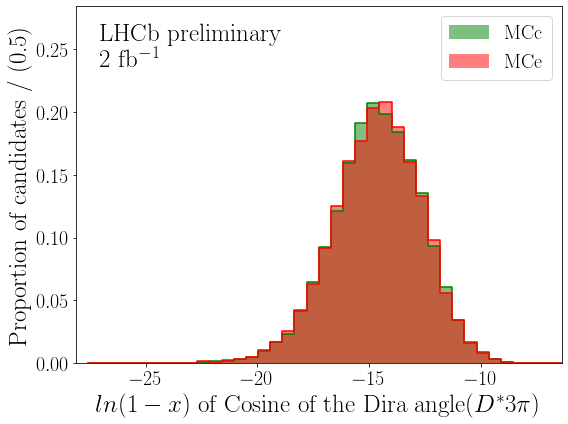

In [13]:
for variable in ['B0_DIRA_OWNPV:ln(1-x)']:
    print(f"=====================  {variable} =====================")
    
    if variable in range_dic:
        low = range_dic[variable][0]
        high = range_dic[variable][1]
    else:
        low = None
        high = None
        
    fig, ax = h.plot_hist_particle({'MCc': df['training_MCc'], 'MCe': df['training_MCe']}, variable, alpha=0.5, 
                         n_bins=40, mode_hist = True, colors=['g', 'r'], low=None, high=None, 
                         pos_text_LHC=[0.05, 0.95, 'left'], 
                         label_ncounts=False, save_fig=False)
    save_file(fig, f'{variable}_Signal_Background',name_folder=f'MCc_MCe/variables/')

=====================  B0_ETA =====================
/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/B0_ETA_MCc_MCe
=====================  B0_DIRA_OWNPV:ln(1-x) =====================
/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/B0_DIRA_OWNPV:ln(1-x)_MCc_MCe
=====================  B0_ENDVERTEX_CHI2,B0_ENDVERTEX_NDOF:x/y =====================
/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/B0_ENDVERTEX_CHI2,B0_ENDVERTEX_NDOF:xdy_MCc_MCe
=====================  B0_PT =====================
/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/B0_PT_MCc_MCe
=====================  B0_FDCHI2_OWNPV:ln(x) =====================
/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/B0_FDCHI2_OWNPV:ln(x)_MCc_MCe
=====================  B0_IP_OWNPV =====================
/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/B0_IP_OWNPV_MCc_MCe
=====================  B0_FD_OWNPV =====================
/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/B0_FD_OWNPV_MCc_MCe
=====================  

/afs/cern.ch/work/c/correian/miniconda/envs/bd2dst3pi_env/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/afs/cern.ch/work/c/correian/miniconda/envs/bd2dst3pi_env/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/afs/cern.ch/work/c/correian/miniconda/envs/bd2dst3pi_env/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/afs/cern.ch/work/c/correian/miniconda/envs/bd2dst3pi_env/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/Dst_FDCHI2_OWNPV:ln(x)_MCc_MCe
=====================  Dst_IPCHI2_OWNPV:ln(x) =====================


/afs/cern.ch/work/c/correian/miniconda/envs/bd2dst3pi_env/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/afs/cern.ch/work/c/correian/miniconda/envs/bd2dst3pi_env/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/afs/cern.ch/work/c/correian/miniconda/envs/bd2dst3pi_env/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/afs/cern.ch/work/c/correian/miniconda/envs/bd2dst3pi_env/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/Dst_IPCHI2_OWNPV:ln(x)_MCc_MCe
=====================  Dst_IP_OWNPV =====================
/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/Dst_IP_OWNPV_MCc_MCe
=====================  Dst_FD_OWNPV =====================
/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/Dst_FD_OWNPV_MCc_MCe
=====================  D0_ETA =====================
/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/D0_ETA_MCc_MCe
=====================  D0_DIRA_OWNPV:ln(1-x) =====================
/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/D0_DIRA_OWNPV:ln(1-x)_MCc_MCe
=====================  D0_ENDVERTEX_CHI2,D0_ENDVERTEX_NDOF:x/y =====================
/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/D0_ENDVERTEX_CHI2,D0_ENDVERTEX_NDOF:xdy_MCc_MCe
=====================  D0_PT =====================
/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/D0_PT_MCc_MCe
=====================  D0_FDCHI2_OWNPV:ln(x) =====================
/afs/cern.ch/user/

/afs/cern.ch/user/c/correian/bd2dst3pi/scripts/plot/histogram.py:228: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(8,6))


/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/D0_IP_OWNPV_MCc_MCe
=====================  D0_FD_OWNPV =====================
/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/D0_FD_OWNPV_MCc_MCe
=====================  tau_ETA =====================
/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/tau_ETA_MCc_MCe
=====================  tau_DIRA_OWNPV:ln(1-x) =====================
/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/tau_DIRA_OWNPV:ln(1-x)_MCc_MCe
=====================  tau_ENDVERTEX_CHI2,tau_ENDVERTEX_NDOF:x/y =====================
/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/tau_ENDVERTEX_CHI2,tau_ENDVERTEX_NDOF:xdy_MCc_MCe
=====================  tau_PT =====================
/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/tau_PT_MCc_MCe
=====================  tau_FDCHI2_OWNPV:ln(x) =====================
/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/tau_FDCHI2_OWNPV:ln(x)_MCc_MCe
=====================  tau_IPCHI2_OWNPV:ln(x) =====================


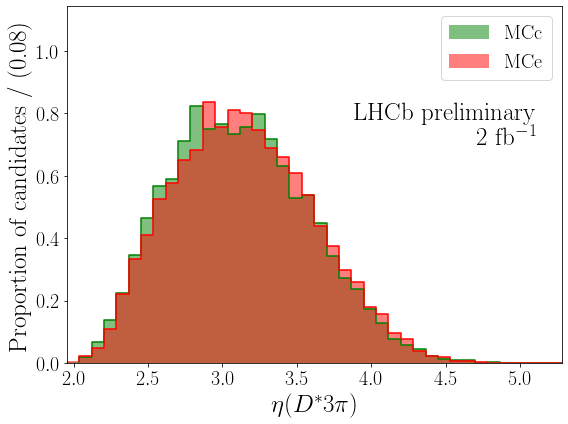

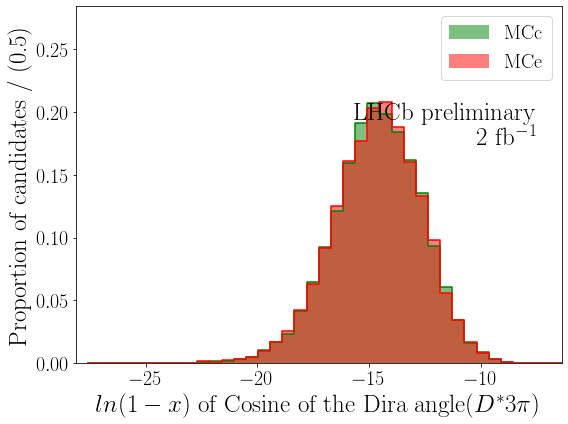

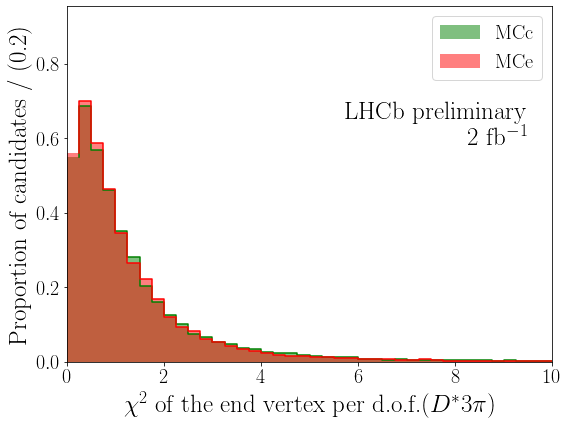

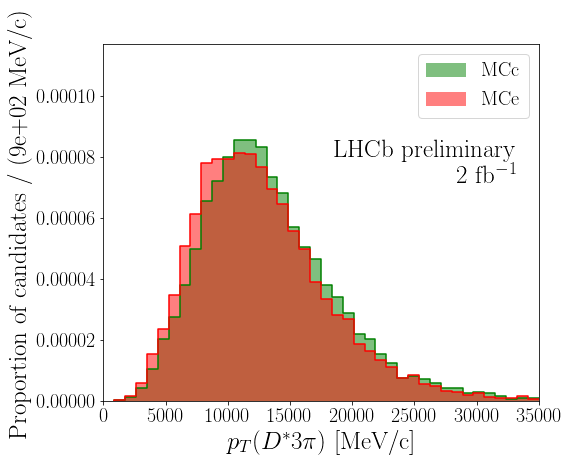

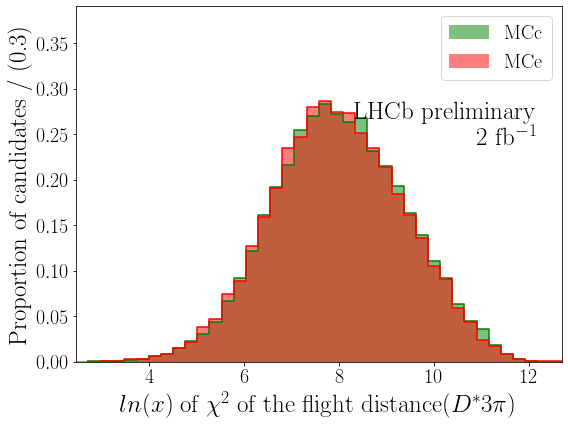

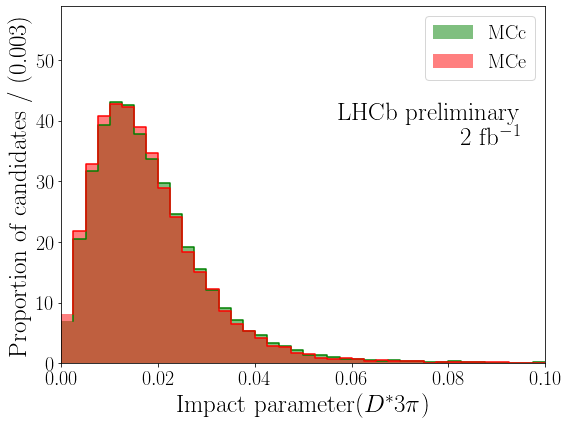

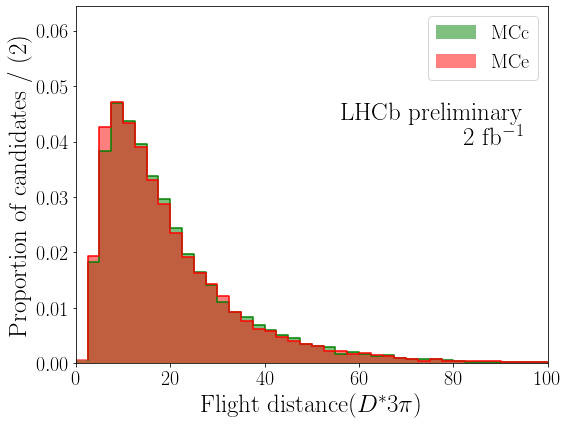

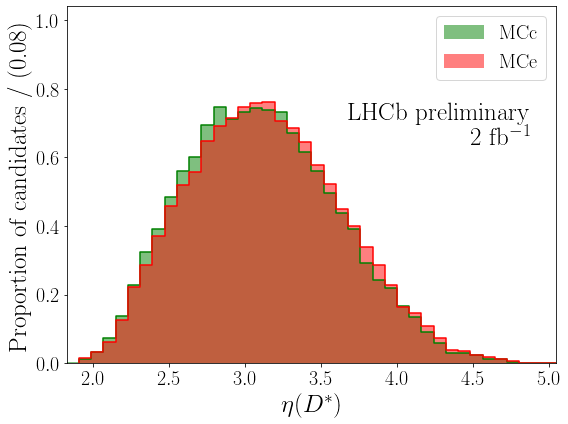

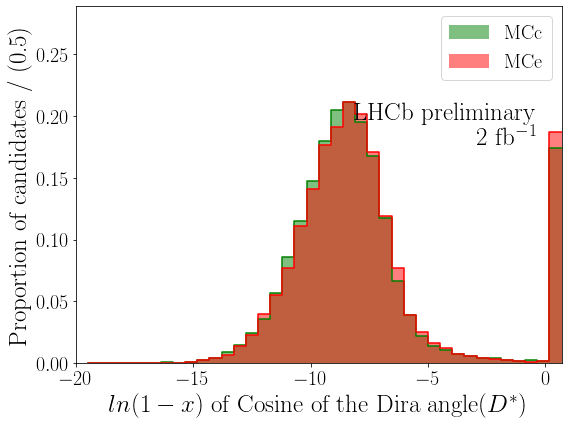

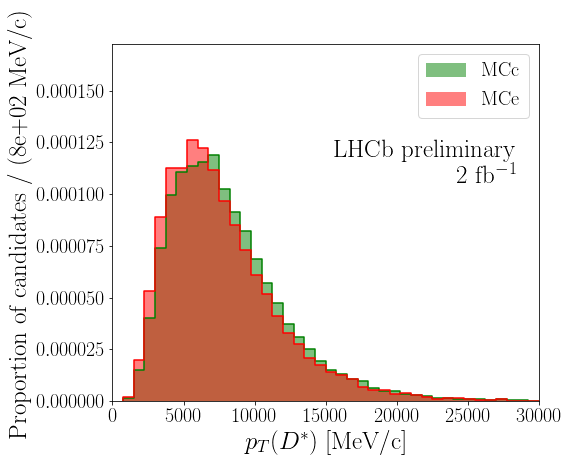

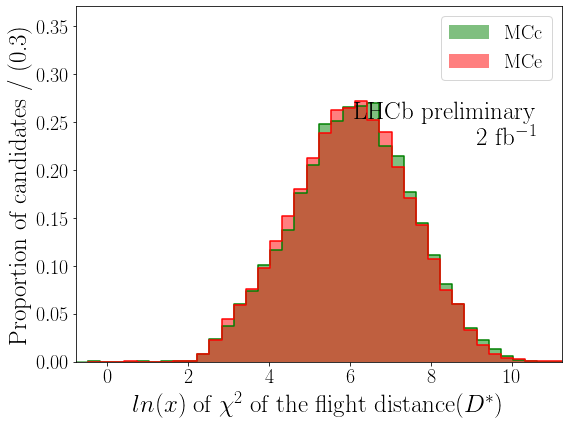

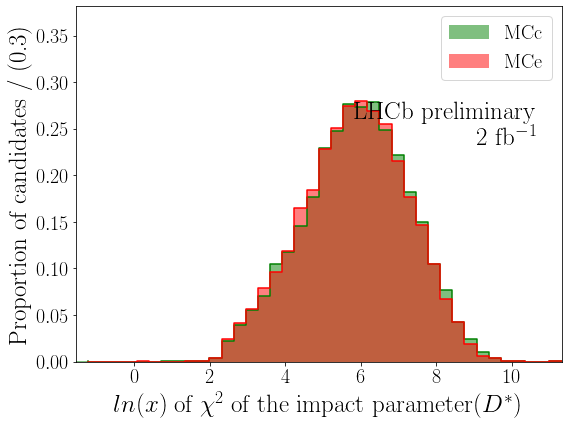

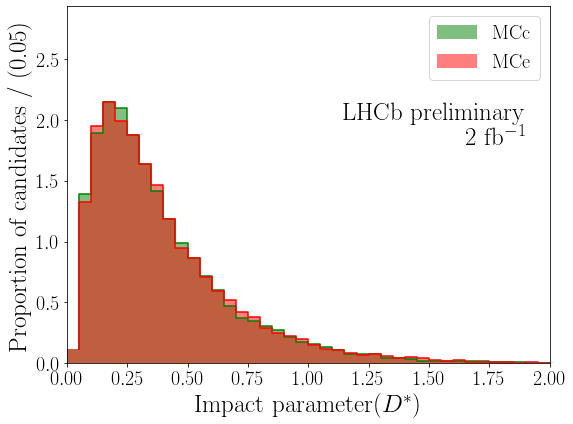

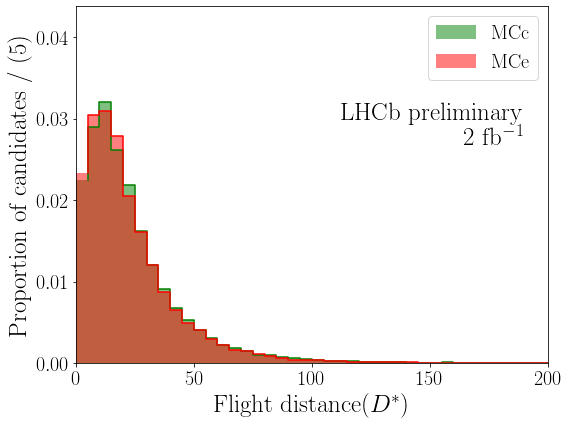

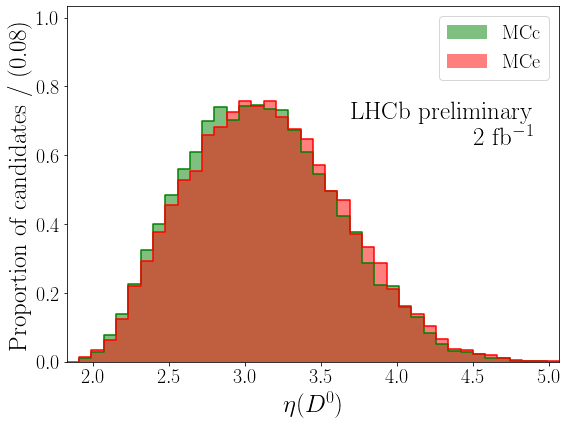

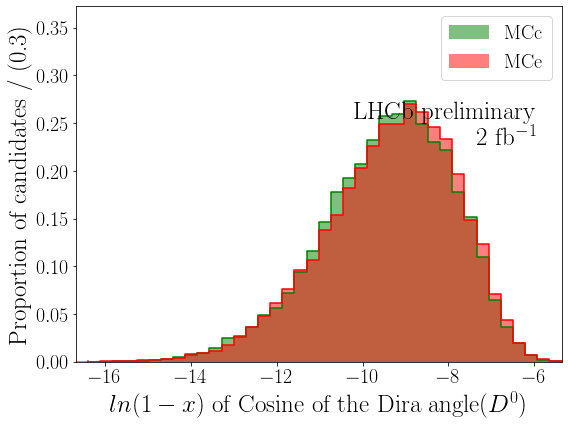

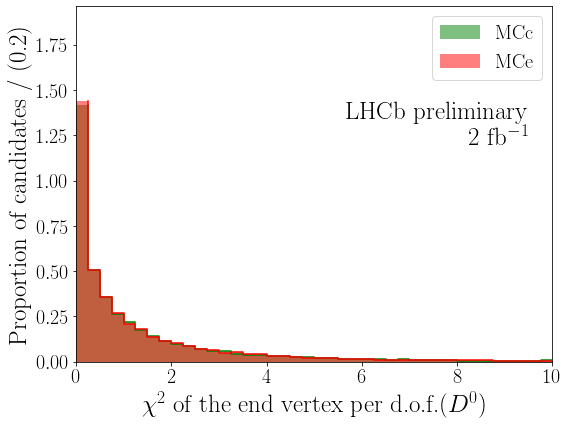

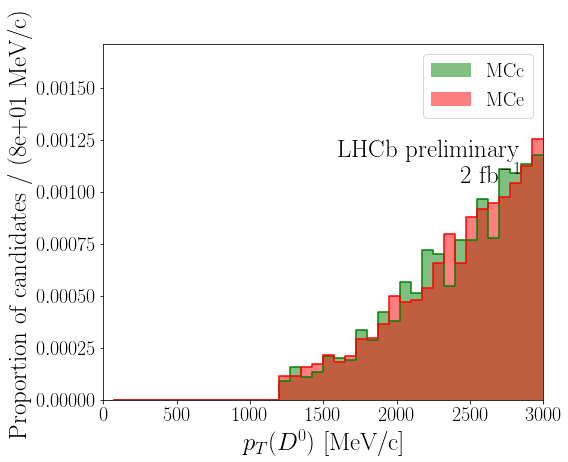

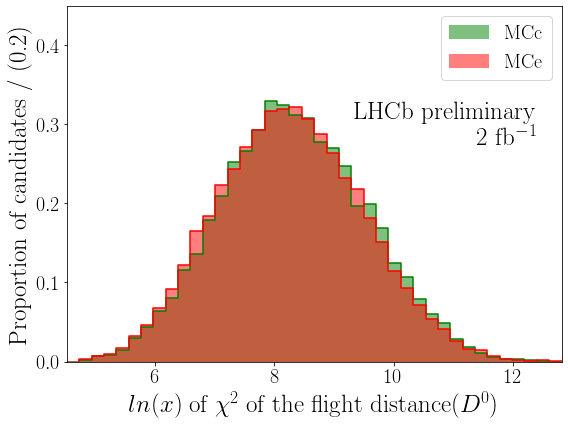

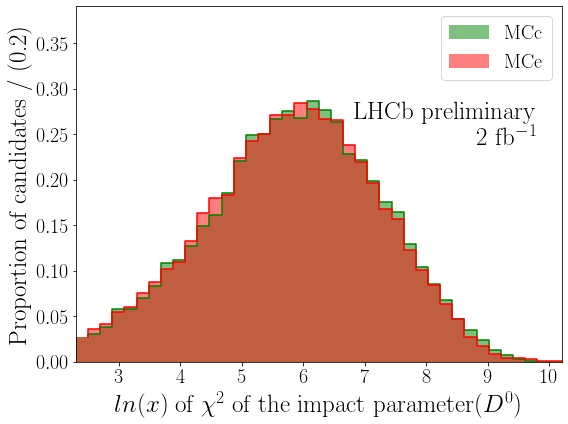

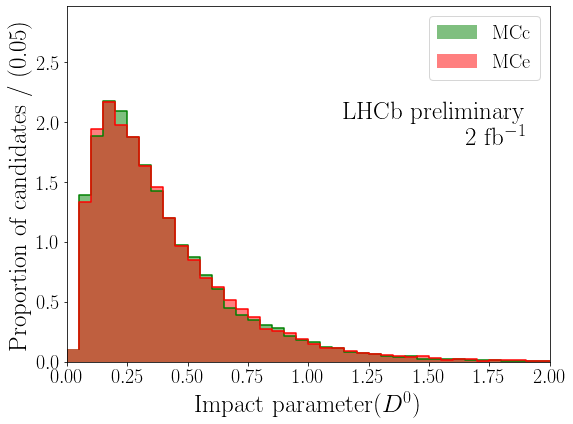

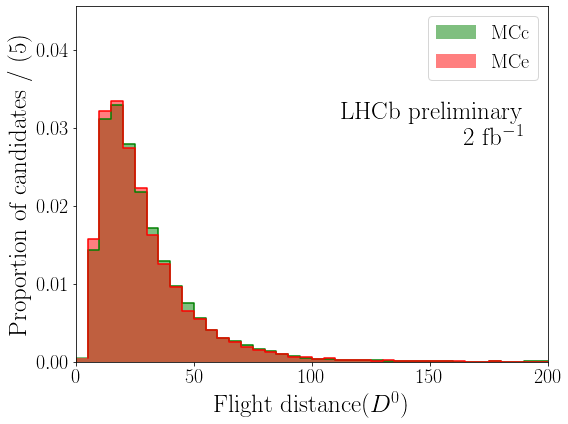

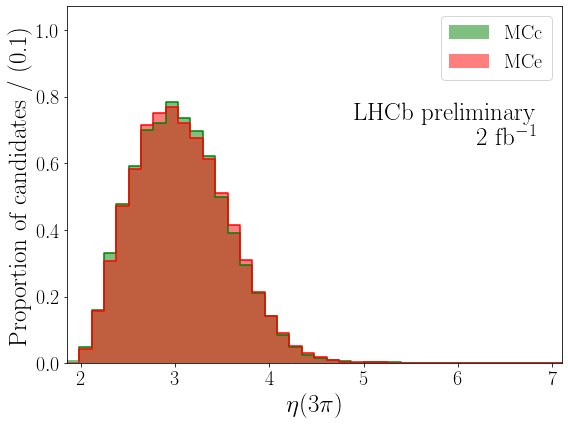

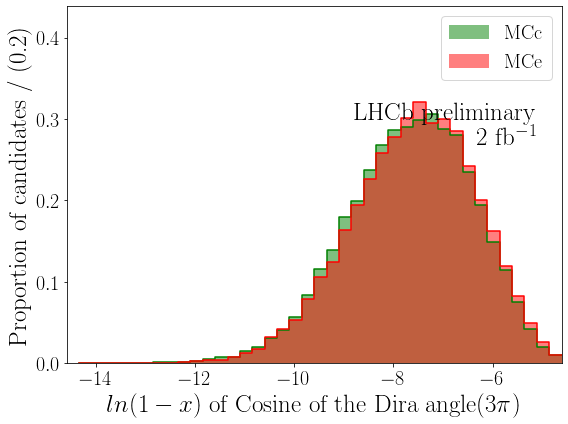

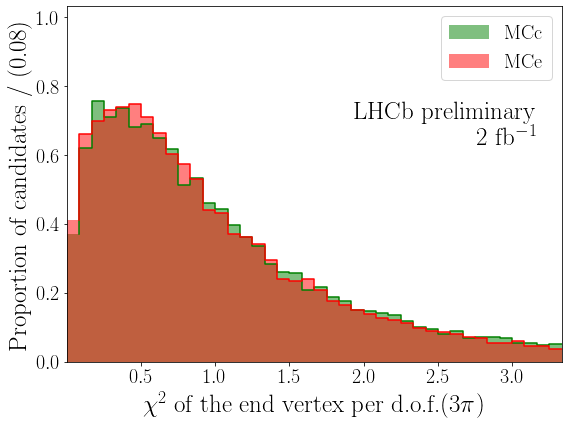

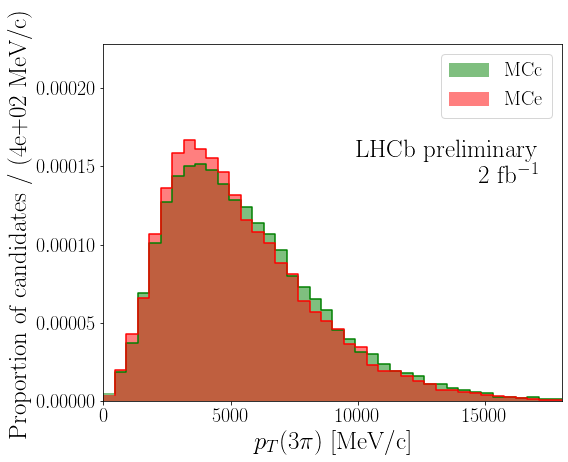

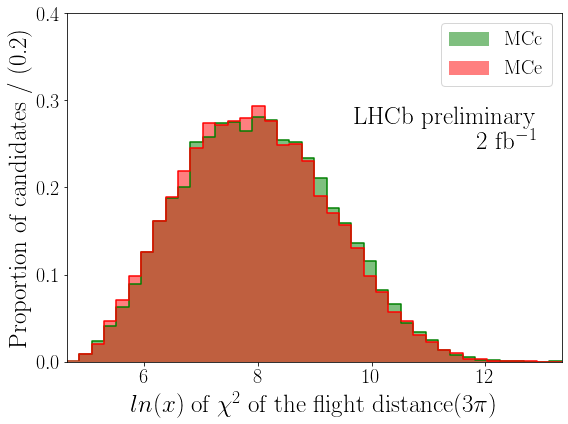

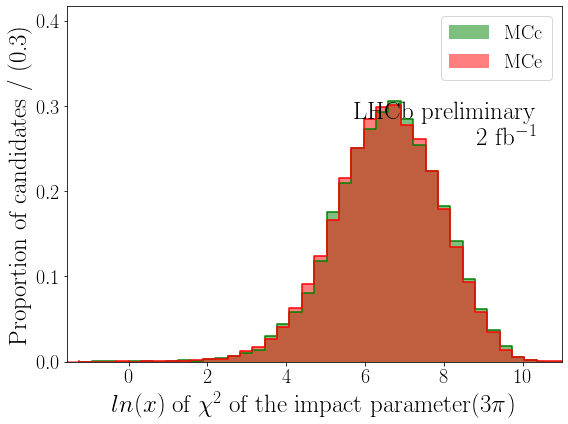

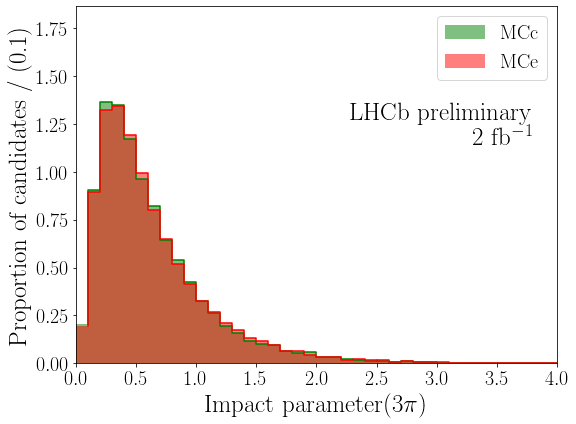

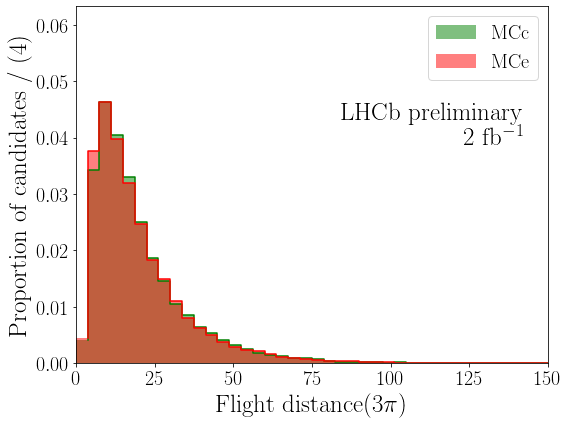

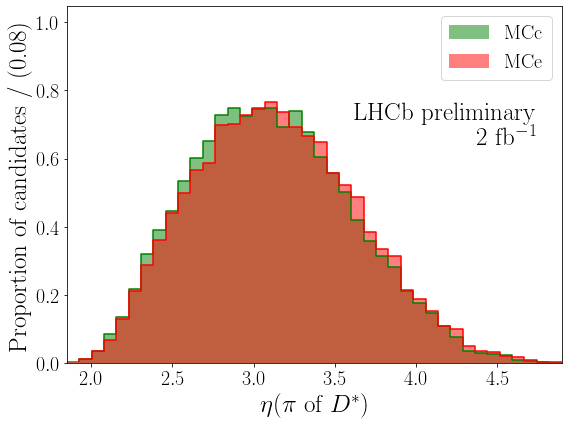

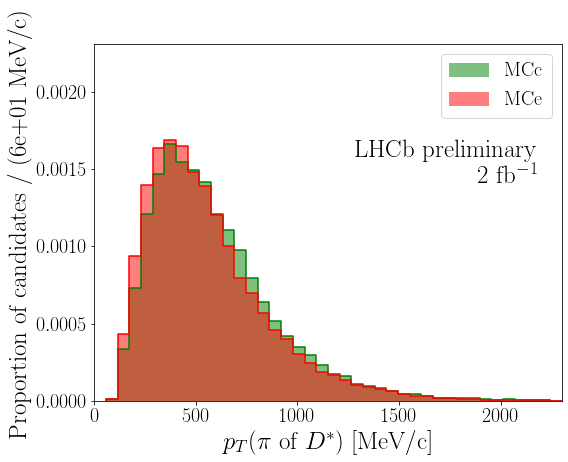

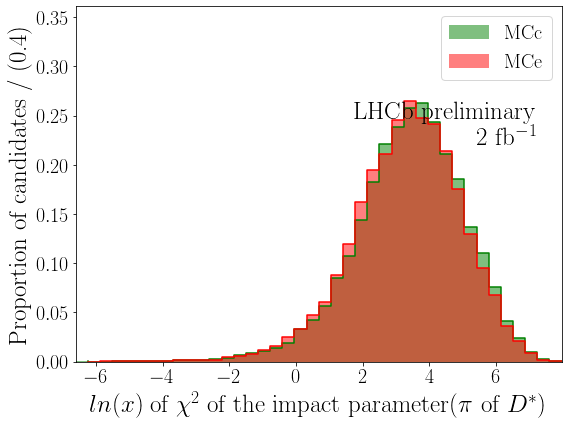

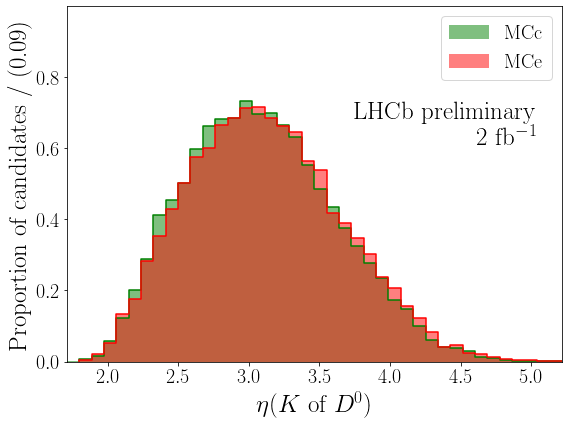

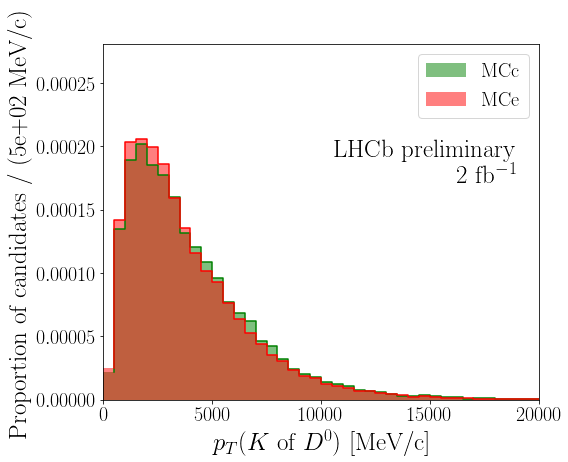

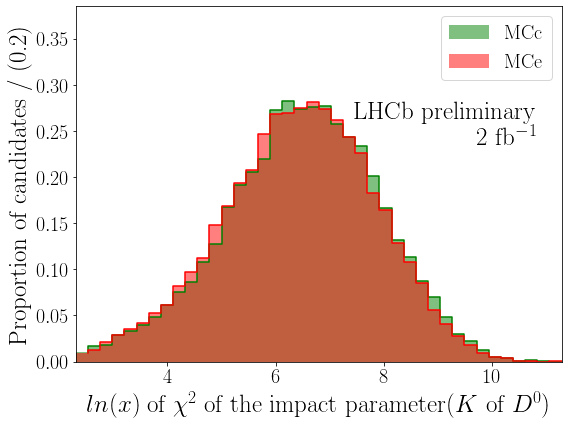

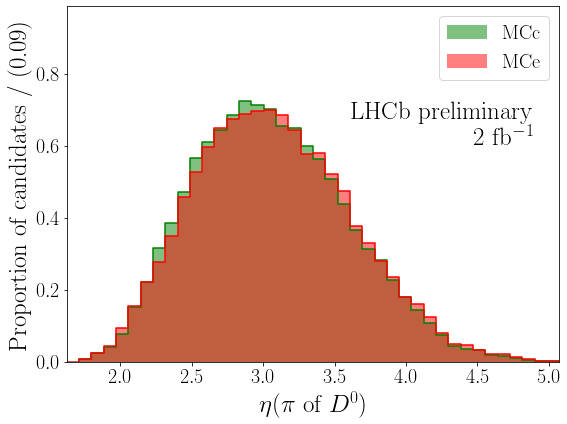

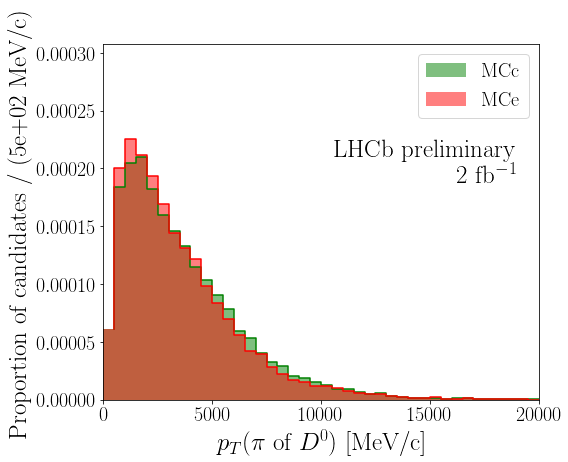

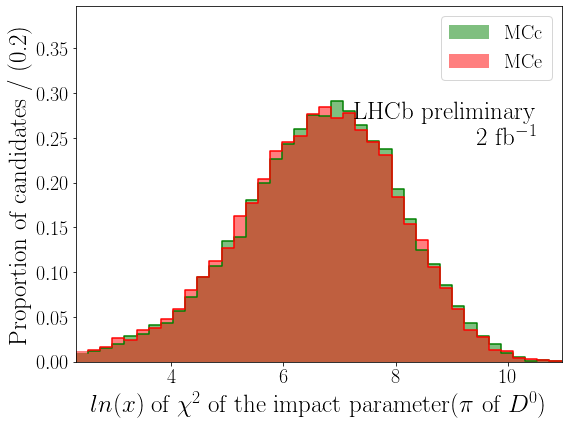

In [16]:
for variable in variables:
    print(f"=====================  {variable} =====================")
    
    if variable in range_dic:
        low = range_dic[variable][0]
        high = range_dic[variable][1]
    else:
        low = None
        high = None
    
    fig, ax = h.plot_hist_particle({'MCc': df['training_MCc'], 'MCe': df['training_MCe']}, variable, alpha=0.5, 
                         n_bins=40, mode_hist = True, colors=['g', 'r'], low=low, high=high, 
                         pos_text_LHC=[0.95, 0.73, 'right'], 
                         label_ncounts=False)

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/Dst_constr_B0_M_MCc_MCe


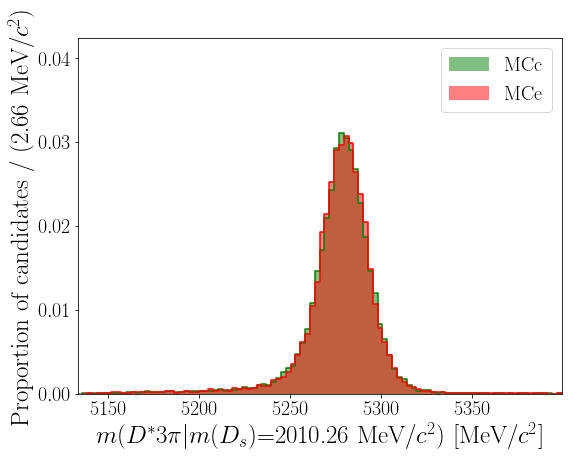

In [16]:
fig, ax = h.plot_hist_particle({'MCc': df['MCc'], 'MCe': df['MCe']}, var, alpha=0.5, 
                         n_bins=100, mode_hist = True, colors=['g', 'r'], low=None, high=None, 
                         label_ncounts=False)